Week 5:
    Program 2: Implement Transfer Learning using MobileNetV2 to classify flower images

Ashwin Saji(240984006)
M.tech Data Science

MobileNetV2 Model

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [3]:
(training_set, validation_set), dataset_info = tfds.load(
    'tf_flowers', 
    split=['train[:70%]', 'train[70%:]'],
    with_info = True,
    as_supervised = True
)

In [4]:
num_classes = dataset_info.features['label'].num_classes

num_training_examples = 0
num_validation_examples = 0

for example in training_set:
    num_training_examples += 1
    
for example in validation_set:
    num_validation_examples += 1
    
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 5
Total Number of Training Images: 2569
Total Number of Validation Images: 1101 



The images in the Flowers dataset are not all the same size.

In [5]:
for i, example in enumerate(training_set.take(5)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))

Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3
Image 4 shape: (240, 320, 3) label: 4
Image 5 shape: (317, 500, 3) label: 3


In [22]:
IMAGE_RES = 224

def format_image(image, label):
  image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
  return image, label

BATCH_SIZE = 32

train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [23]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [24]:
feature_extractor.trainable = False

In [8]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [26]:
EPOCHS = 6

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/6
81/81 [==============================] - 76s 888ms/step - loss: 0.7679 - accuracy: 0.7174 - val_loss: 0.4356 - val_accuracy: 0.8592
Epoch 2/6
81/81 [==============================] - 67s 831ms/step - loss: 0.3753 - accuracy: 0.8786 - val_loss: 0.3678 - val_accuracy: 0.8774
Epoch 3/6
81/81 [==============================] - 69s 850ms/step - loss: 0.2938 - accuracy: 0.9000 - val_loss: 0.3288 - val_accuracy: 0.8883
Epoch 4/6
81/81 [==============================] - 66s 823ms/step - loss: 0.2495 - accuracy: 0.9198 - val_loss: 0.3024 - val_accuracy: 0.8983
Epoch 5/6
81/81 [==============================] - 68s 841ms/step - loss: 0.2142 - accuracy: 0.9397 - val_loss: 0.2941 - val_accuracy: 0.9010
Epoch 6/6
81/81 [==============================] - 65s 805ms/step - loss: 0.1849 - accuracy: 0.9455 - val_loss: 0.3017 - val_accuracy: 0.8965


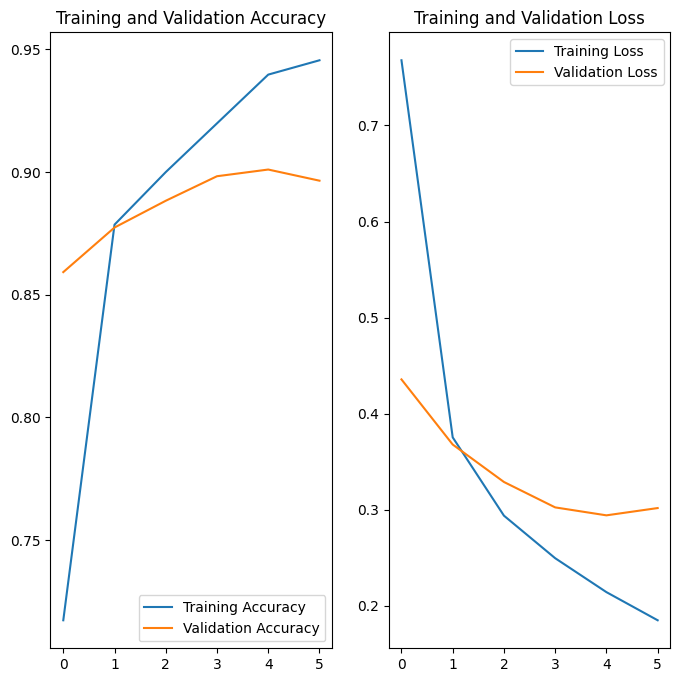

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [11]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [12]:
image_batch, label_batch = next(iter(train_batches))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

print(predicted_class_names)

1/1 [==============================] - 1s 1s/step
['roses' 'tulips' 'tulips' 'tulips' 'roses' 'tulips' 'dandelion' 'tulips'
 'dandelion' 'tulips' 'roses' 'sunflowers' 'sunflowers' 'dandelion'
 'roses' 'tulips' 'daisy' 'sunflowers' 'dandelion' 'tulips' 'dandelion'
 'roses' 'daisy' 'roses' 'daisy' 'daisy' 'daisy' 'dandelion' 'tulips'
 'dandelion' 'roses' 'sunflowers']


In [13]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [4 2 2 2 4 2 0 2 0 2 4 3 3 0 4 2 1 2 0 2 0 4 1 4 1 1 1 0 2 4 4 3]
Predicted labels:  [4 2 2 2 4 2 0 2 0 2 4 3 3 0 4 2 1 3 0 2 0 4 1 4 1 1 1 0 2 0 4 3]


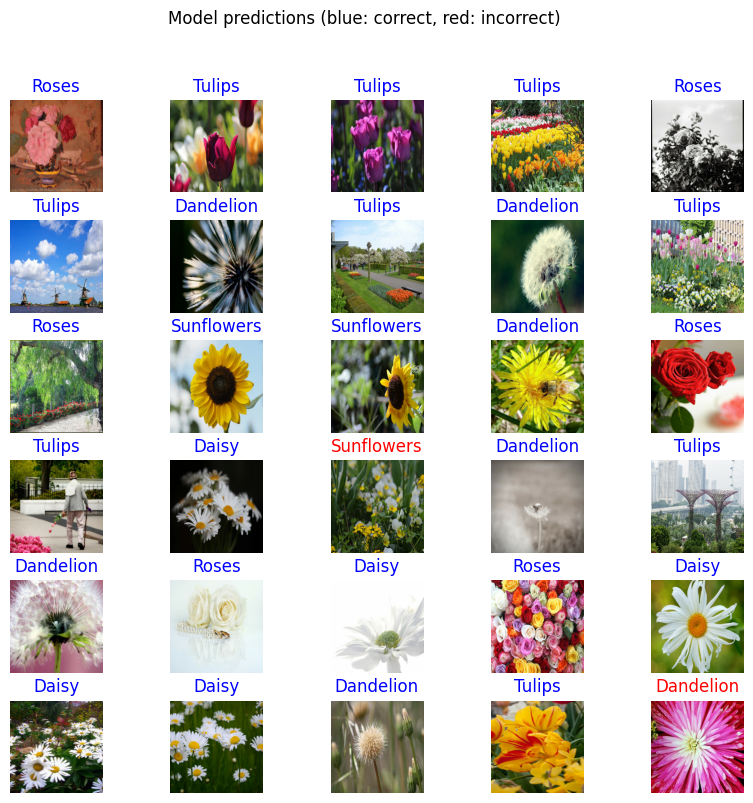

In [14]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

CNN Model

In [10]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,Dropout,Input

In [19]:
cnn=tf.keras.Sequential([
    Input(shape=(224,224,3)),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(num_classes,activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,908,682 (91.20 MB)

 Trainable params: 23,908,682 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history_cnn = cnn.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 337ms/step - accuracy: 0.3733 - loss: 2.1286 - val_accuracy: 0.5195 - val_loss: 1.1674
Epoch 2/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 340ms/step - accuracy: 0.5826 - loss: 1.0513 - val_accuracy: 0.6085 - val_loss: 1.0068
Epoch 3/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 343ms/step - accuracy: 0.7534 - loss: 0.6955 - val_accuracy: 0.6530 - val_loss: 1.0466
Epoch 4/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 361ms/step - accuracy: 0.8801 - loss: 0.3679 - val_accuracy: 0.6376 - val_loss: 1.1351
Epoch 5/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step - accuracy: 0.9557 - loss: 0.1755 - val_accuracy: 0.6249 - val_loss: 1.4222
Epoch 6/6
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 345ms/step - accuracy: 0.9754 - loss: 0.0952 - val_accuracy: 0.6122 - val_loss: 1.6778


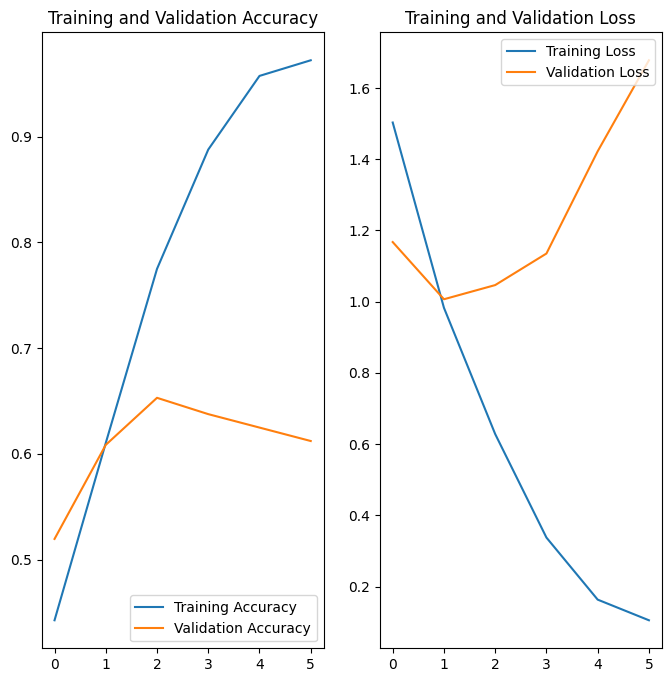

In [28]:
acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']

loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [32]:
image_batch, label_batch = next(iter(train_batches))


image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = cnn.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]

print(predicted_class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
['tulips' 'dandelion' 'daisy' 'daisy' 'dandelion' 'roses' 'dandelion'
 'daisy' 'tulips' 'daisy' 'daisy' 'dandelion' 'sunflowers' 'dandelion'
 'tulips' 'tulips' 'daisy' 'dandelion' 'daisy' 'dandelion' 'roses'
 'dandelion' 'dandelion' 'daisy' 'tulips' 'tulips' 'tulips' 'dandelion'
 'dandelion' 'dandelion' 'roses' 'roses']


In [33]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [2 0 1 1 0 4 0 1 2 1 1 0 3 0 2 2 1 0 1 2 4 0 0 1 2 2 2 0 0 0 4 4]
Predicted labels:  [2 0 1 1 0 4 0 1 2 1 1 0 3 0 2 2 1 0 1 0 4 0 0 1 2 2 2 0 0 0 4 4]


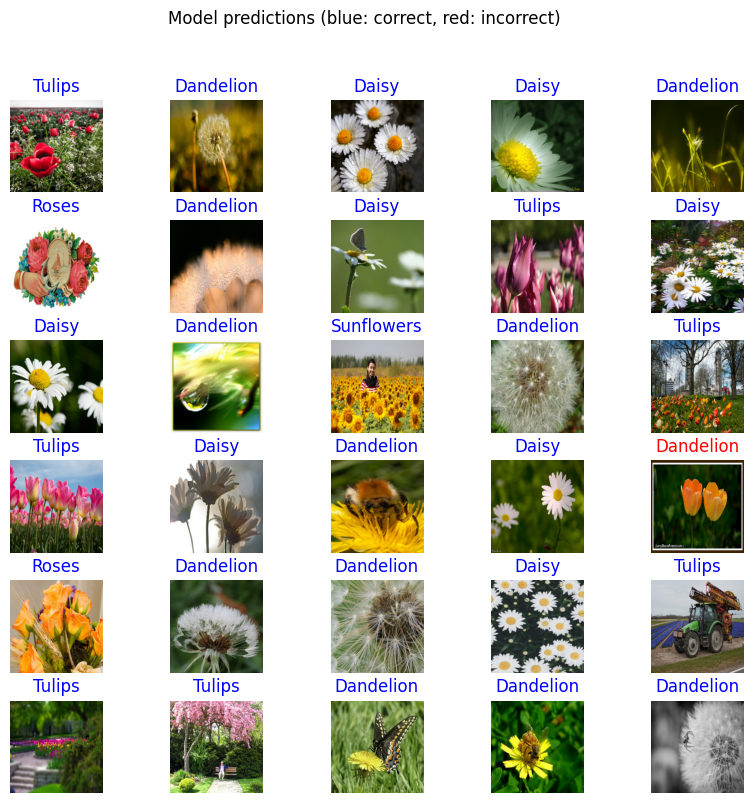

In [34]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

Benefit of using MobileNetV2:

    1.It is efficient in terms of computational resources used

    2.Uses depthwise convolutions to reduce parameters

Comparison of CNN and MobileNetV2:
| Model | Training time  | Accuracy(validation) | Accuracy(train) |
|:------|:------|:------|:------|
| CNN | 169.2s | 61.22% | 97.54% |
| MobileNetV2 | 155.3s | 89.65% | 94.55% |

Remarks: Transfer learning using MobilenetV2 gives much better validation set accuracy than a conventional CNN model